<a href="https://colab.research.google.com/github/Itspravin08/Breast-Cancer-Prediction-Using-Machine-Learning/blob/main/Predict_the_price_of_gifts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict the price of gifts using ML Algorithms


Problem statement

One of the main goals of online retailers is to increase the desirability and the value of the products. To achieve this goal, various promotional techniques are planned. Among these techniques, offering promotions and special offers to the customers is an effective method of driving ancillary traffic to the site, acquiring new customers, and growing the revenue. These advancements can likewise be utilized to encourage new visitors to become loyal customers.

An online retailer has launched a special sale of gifts for the Good Friday event. They have approached you to build a model that helps them to set the prices for their gifts. The data provided is a combination of multiple categories and dates related to gifts.

However, based on these certain features you are required to build a model that can predict the prices of the different packages.

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 Step-1 load and Read the Data Set Using Pandas Lib

In [3]:
Data_sets= pd.read_csv("Product_price_of_Gifts.csv")
Data_sets.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes,price
0,GF_11156,61,534,3942,2014-02-21 05:07:06.000,2016-11-09 15:49:51.000,3377,5221,504,1912,10,554,2014-02-24 08:07:06.000,2014-02-24 07:07:06.000,0.0,NaN,175.54
1,GF_11157,61,534,3942,2014-02-21 06:07:06.000,2016-11-11 13:49:51.000,3377,5221,504,1912,10,554,2014-02-22 07:07:06.000,2014-02-24 06:07:06.000,1.0,NaN,95.80
2,GF_15689,584,262,0,2014-02-21 09:30:21.000,2016-03-24 14:46:18.000,5290,1579,3203,1912,9,1578,2016-01-26 00:04:45.000,2016-03-18 02:00:00.000,1.0,NaN,107.35
3,GF_11155,61,534,3942,2014-02-22 05:07:06.000,2016-11-10 16:49:51.000,3377,5221,504,1912,10,554,2016-11-07 13:49:51.000,2016-11-06 04:00:00.000,0.0,NaN,172.90
4,GF_11158,61,534,3942,2014-02-22 07:07:06.000,2016-11-10 13:49:51.000,3377,5221,504,1912,9,554,2016-11-07 15:49:51.000,2016-11-06 01:00:00.000,1.0,NaN,77.72


#Data Perprocessing
Understanding Data_set using Pandas Lib

In [7]:
Data_sets.shape   # Find who mach shape are avalibale in data Sets


(20279, 17)

In [8]:
Data_sets.info()  # Display All Information about Data Sets (Data Type of Variables)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20279 entries, 0 to 20278
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gift_id            20279 non-null  object 
 1   gift_type          20279 non-null  int64  
 2   gift_category      20279 non-null  int64  
 3   gift_cluster       20279 non-null  int64  
 4   instock_date       20279 non-null  object 
 5   stock_update_date  20279 non-null  object 
 6   lsg_1              20279 non-null  int64  
 7   lsg_2              20279 non-null  int64  
 8   lsg_3              20279 non-null  int64  
 9   lsg_4              20279 non-null  int64  
 10  lsg_5              20279 non-null  int64  
 11  lsg_6              20279 non-null  int64  
 12  uk_date1           20279 non-null  object 
 13  uk_date2           20279 non-null  object 
 14  is_discounted      20279 non-null  int64  
 15  volumes            7323 non-null   float64
 16  price              202

In [9]:
Data_sets.describe()

,gift_type,gift_category,gift_cluster,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,is_discounted,volumes,price
count,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,7323.000000,20279.000000
mean,739.554662,394.171557,3303.358548,5314.595345,4187.653928,4866.945510,1679.152226,8.652695,1265.898171,0.229646,15.515363,143.404411
std,389.216989,235.077769,2541.082549,2703.317282,2274.875522,2713.856392,485.699119,2.349388,697.838495,0.420616,7.579669,267.281159
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,5.000000,0.010000
25%,403.000000,188.000000,587.000000,3311.000000,2251.000000,2548.000000,1801.000000,9.000000,577.500000,0.000000,9.000000,45.645000
50%,825.000000,433.000000,3231.000000,5520.000000,4246.000000,4839.000000,1912.000000,9.000000,1616.000000,0.000000,13.000000,75.600000
75%,1032.000000,534.000000,5787.000000,7535.000000,6504.500000,7387.000000,1912.000000,10.000000,1899.000000,0.000000,24.000000,126.845000
max,1360.000000,893.000000,7567.000000,9979.000000,7604.000000,9493.000000,2056.000000,10.000000,2065.000000,1.000000,29.000000,7010.270000


Find the Null values in Data Sets And Replace the null values using 'ffill' method



In [52]:
Data_sets.isna().sum()  # Find the Null values in Data Sets And Count nall value using sum()


gift_id                  0
gift_type                0
gift_category            0
gift_cluster             0
instock_date             0
stock_update_date        0
lsg_1                    0
lsg_2                    0
lsg_3                    0
lsg_4                    0
lsg_5                    0
lsg_6                    0
uk_date1                 0
uk_date2                 0
is_discounted            0
volumes              12956
price                    0
dtype: int64

In [5]:
New_Data_sets=Data_sets.fillna(Data_sets.median()) # Replace the null values using 'ffill' method And Using Median
New_Data_sets.isna().sum()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


gift_id              0
gift_type            0
gift_category        0
gift_cluster         0
instock_date         0
stock_update_date    0
lsg_1                0
lsg_2                0
lsg_3                0
lsg_4                0
lsg_5                0
lsg_6                0
uk_date1             0
uk_date2             0
is_discounted        0
volumes              0
price                0
dtype: int64

In [6]:
New_Data_sets.corr() #A correlation matrix is a tabular data representing the 'correlations' between pairs of variables in a given data

,gift_type,gift_category,gift_cluster,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,is_discounted,volumes,price
gift_type,1.000000,0.059389,-0.162431,0.446325,-0.086116,0.446399,0.068064,-0.114675,0.049534,-0.002355,0.009650,0.174442
gift_category,0.059389,1.000000,-0.137294,-0.024914,0.021282,-0.079426,0.047774,-0.412192,0.137331,0.082200,-0.025874,0.340343
gift_cluster,-0.162431,-0.137294,1.000000,-0.094159,0.117651,0.073248,0.098462,0.200232,0.052053,0.067238,0.093191,-0.315112
lsg_1,0.446325,-0.024914,-0.094159,1.000000,-0.185917,0.614654,0.004089,-0.022229,0.037082,-0.157792,0.145177,0.125482
lsg_2,-0.086116,0.021282,0.117651,-0.185917,1.000000,-0.061691,0.024135,0.079769,-0.055787,0.064369,0.073651,-0.215045
lsg_3,0.446399,-0.079426,0.073248,0.614654,-0.061691,1.000000,0.178075,0.055035,0.133367,-0.103825,0.209159,-0.015098
lsg_4,0.068064,0.047774,0.098462,0.004089,0.024135,0.178075,1.000000,0.216056,0.390801,0.174947,-0.022200,-0.207830
lsg_5,-0.114675,-0.412192,0.200232,-0.022229,0.079769,0.055035,0.216056,1.000000,0.117108,0.046704,0.062625,-0.564107
lsg_6,0.049534,0.137331,0.052053,0.037082,-0.055787,0.133367,0.390801,0.117108,1.000000,0.130327,0.076673,-0.009303
is_discounted,-0.002355,0.082200,0.067238,-0.157792,0.064369,-0.103825,0.174947,0.046704,0.130327,1.000000,-0.078992,-0.120434


Dorw heat map using corr()

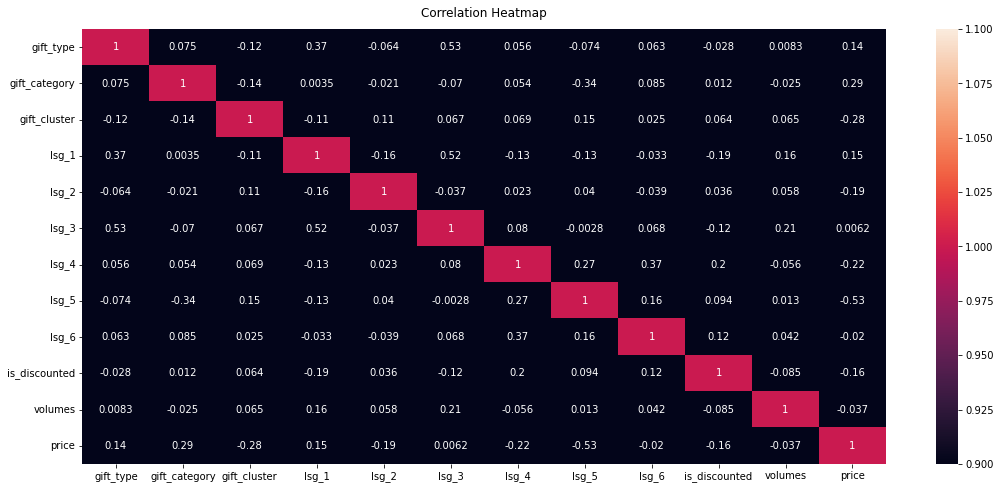

In [60]:
plt.figure(figsize=(18,8))
import seaborn as sns
HeatMap=sns.heatmap(New_Data_sets.corr(),vmin=1,vmax=1,annot=True)
HeatMap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig("correlation_heatmap.png")


Drow Pair Plot Using sns

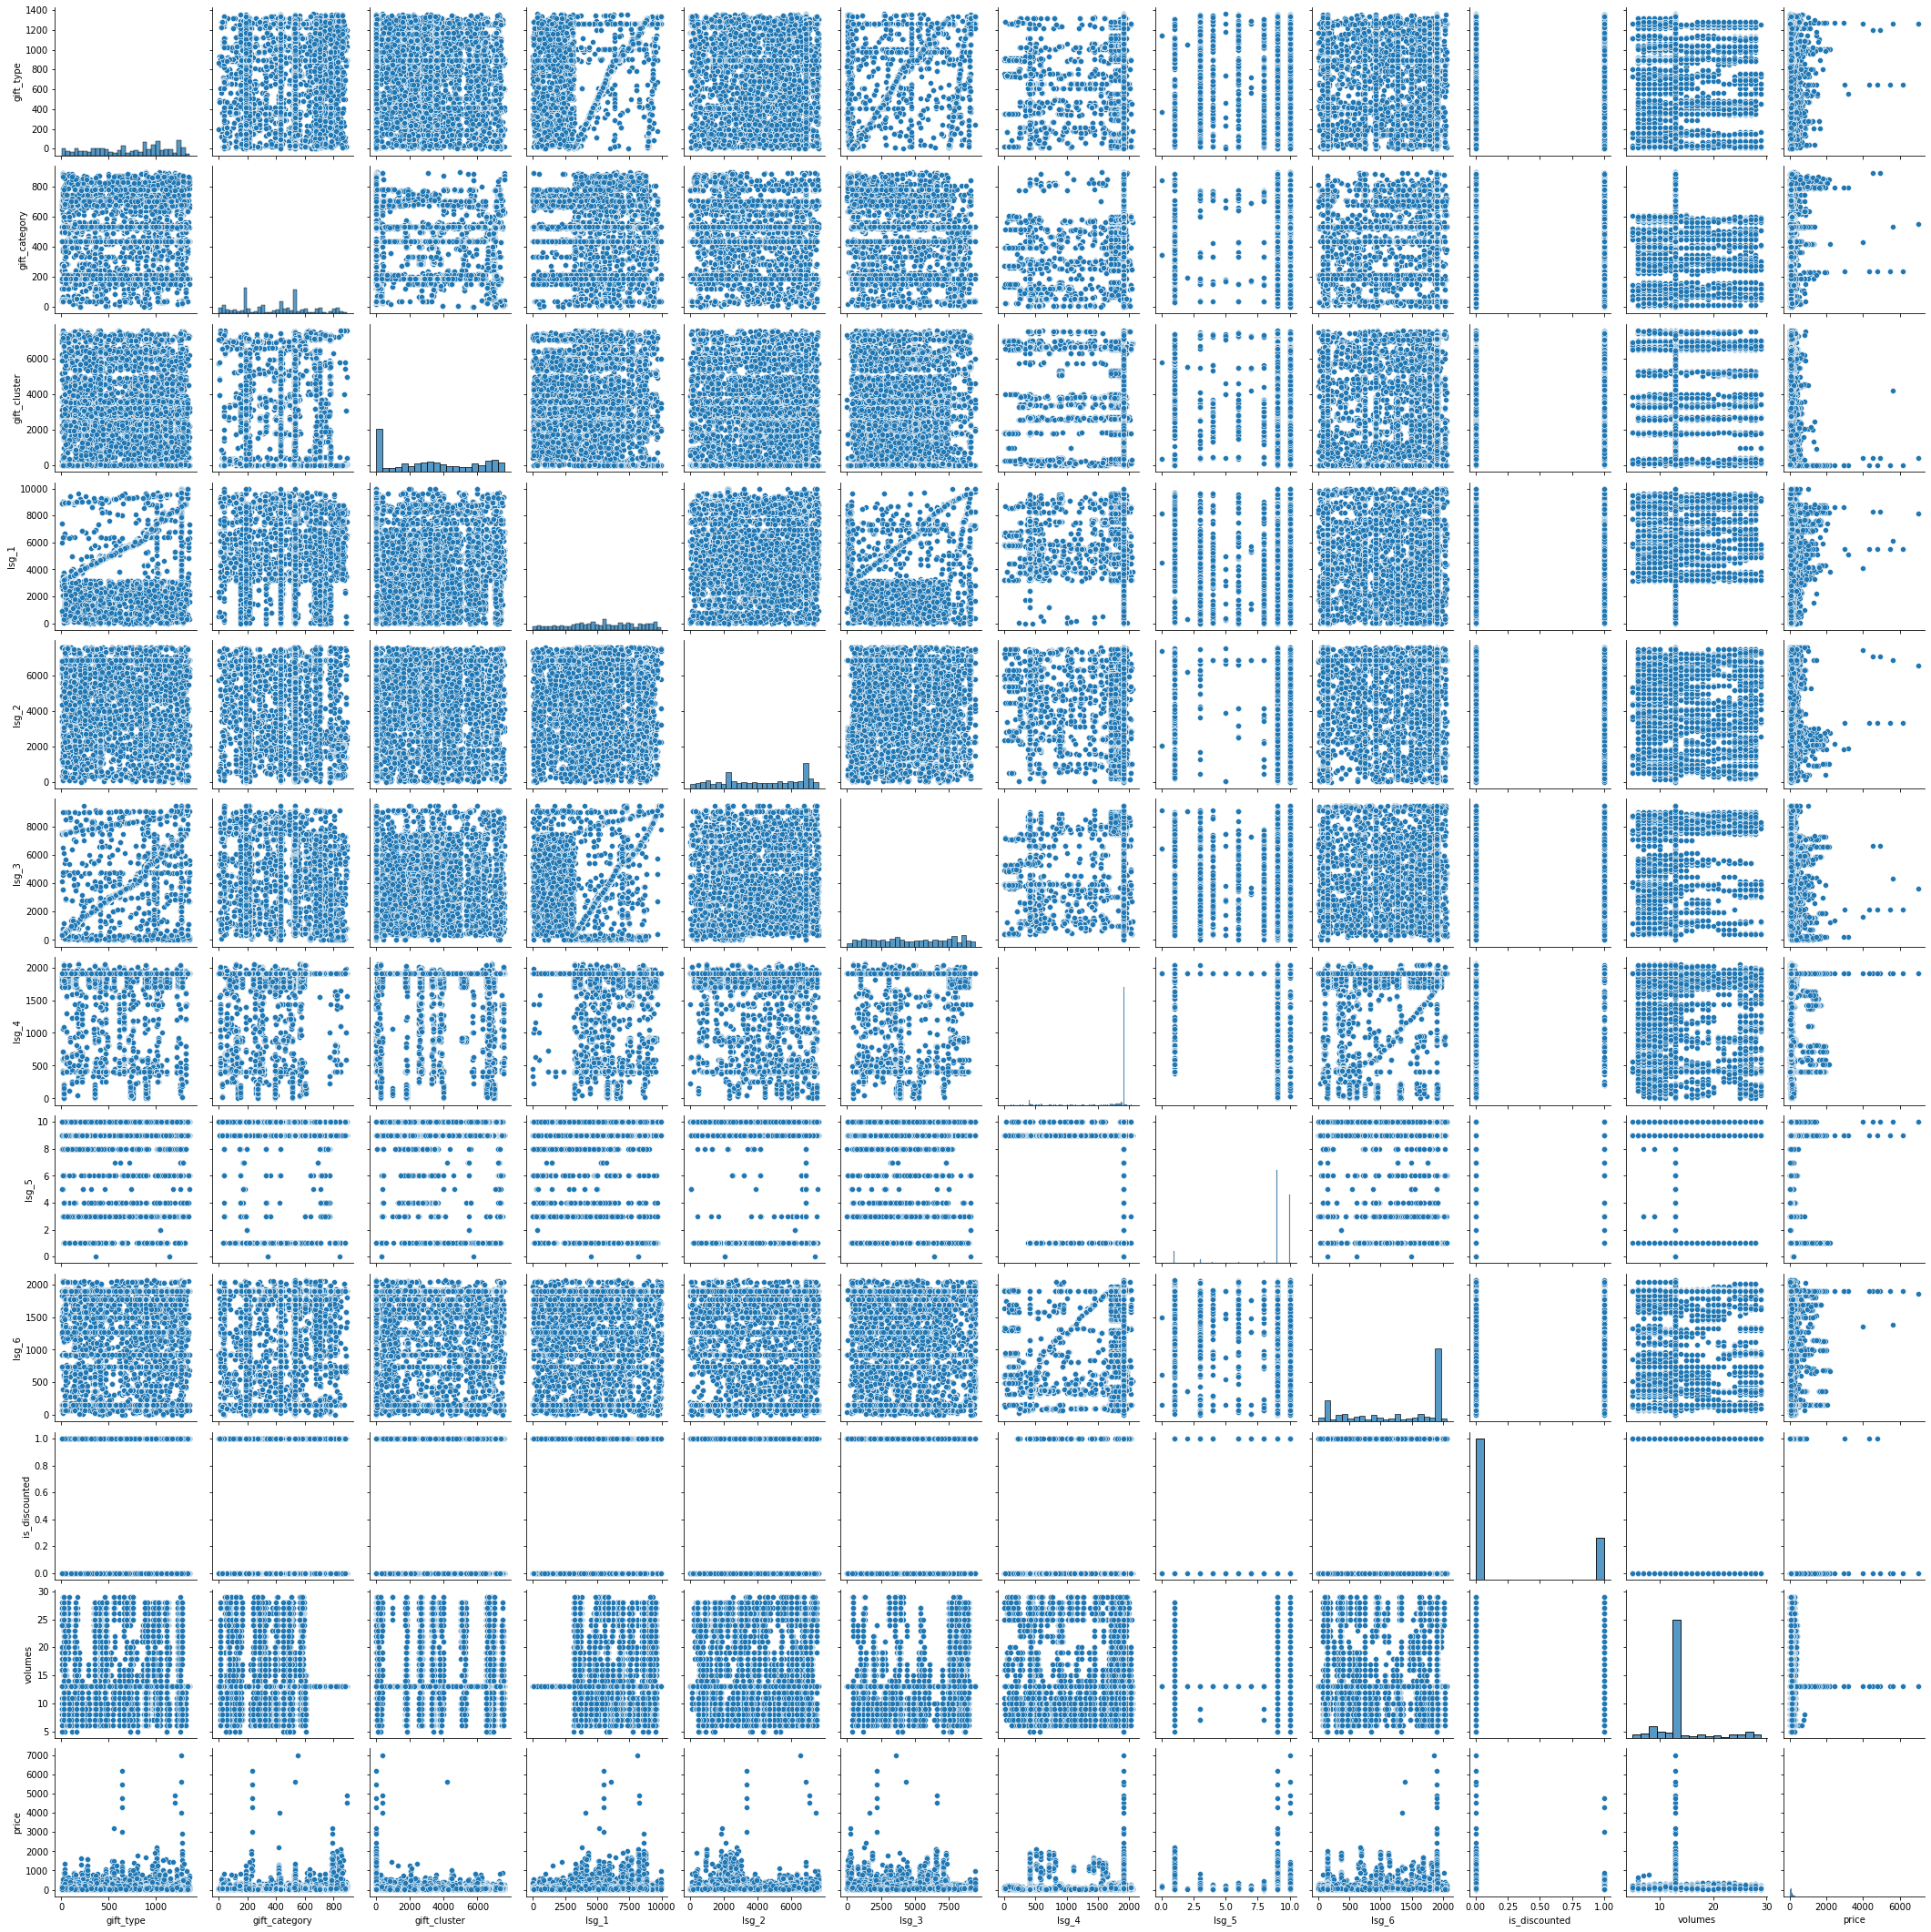

In [61]:
PairPlot=sns.pairplot(New_Data_sets,height=2.5)

#Step-3 Find Dependent And Independent Variables "X are Independent & Y are Dependent Variables"

In [7]:
X=New_Data_sets.iloc[:,:-1]  # Independent Variables
X.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes
0,GF_11156,61,534,3942,2014-02-21 05:07:06.000,2016-11-09 15:49:51.000,3377,5221,504,1912,10,554,2014-02-24 08:07:06.000,2014-02-24 07:07:06.000,0.0,13.0
1,GF_11157,61,534,3942,2014-02-21 06:07:06.000,2016-11-11 13:49:51.000,3377,5221,504,1912,10,554,2014-02-22 07:07:06.000,2014-02-24 06:07:06.000,1.0,13.0
2,GF_15689,584,262,0,2014-02-21 09:30:21.000,2016-03-24 14:46:18.000,5290,1579,3203,1912,9,1578,2016-01-26 00:04:45.000,2016-03-18 02:00:00.000,1.0,13.0
3,GF_11155,61,534,3942,2014-02-22 05:07:06.000,2016-11-10 16:49:51.000,3377,5221,504,1912,10,554,2016-11-07 13:49:51.000,2016-11-06 04:00:00.000,0.0,13.0
4,GF_11158,61,534,3942,2014-02-22 07:07:06.000,2016-11-10 13:49:51.000,3377,5221,504,1912,9,554,2016-11-07 15:49:51.000,2016-11-06 01:00:00.000,1.0,13.0


In [8]:
y=New_Data_sets.iloc[:,-1]  # Traget Variable Find Price
y.head()
New_Data_sets.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes,price
0,GF_11156,61,534,3942,2014-02-21 05:07:06.000,2016-11-09 15:49:51.000,3377,5221,504,1912,10,554,2014-02-24 08:07:06.000,2014-02-24 07:07:06.000,0.0,13.0,175.54
1,GF_11157,61,534,3942,2014-02-21 06:07:06.000,2016-11-11 13:49:51.000,3377,5221,504,1912,10,554,2014-02-22 07:07:06.000,2014-02-24 06:07:06.000,1.0,13.0,95.80
2,GF_15689,584,262,0,2014-02-21 09:30:21.000,2016-03-24 14:46:18.000,5290,1579,3203,1912,9,1578,2016-01-26 00:04:45.000,2016-03-18 02:00:00.000,1.0,13.0,107.35
3,GF_11155,61,534,3942,2014-02-22 05:07:06.000,2016-11-10 16:49:51.000,3377,5221,504,1912,10,554,2016-11-07 13:49:51.000,2016-11-06 04:00:00.000,0.0,13.0,172.90
4,GF_11158,61,534,3942,2014-02-22 07:07:06.000,2016-11-10 13:49:51.000,3377,5221,504,1912,9,554,2016-11-07 15:49:51.000,2016-11-06 01:00:00.000,1.0,13.0,77.72


# Features Seleaction
Seleact Required Features form data_Sets to build a model that can predict the prices of the different packages


In [9]:
X_Features = X.drop(['gift_id','instock_date','stock_update_date','uk_date1','uk_date2'],axis=1)


In [41]:
X_Features.head()

,gift_type,gift_category,gift_cluster,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,is_discounted,volumes
0,61,534,3942,3377,5221,504,1912,10,554,0.0,13.0
1,61,534,3942,3377,5221,504,1912,10,554,1.0,13.0
2,584,262,0,5290,1579,3203,1912,9,1578,1.0,13.0
3,61,534,3942,3377,5221,504,1912,10,554,0.0,13.0
4,61,534,3942,3377,5221,504,1912,9,554,1.0,13.0


# Sept-4 Splitting the dataset into training and Test set.

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_Features,y,test_size=0.2)
#X_train.head()

#Train the Multiple Linear Regression model Using Training set

# Using LinearRegression() Model

In [39]:
# Fit values to Train Linear regression Model Using  Training Data_set

from sklearn.ensemble import RandomForestRegressor
Model=RandomForestRegressor()
Model.fit(X_train,y_train)

RandomForestRegressor()

#Prediction
Predicting the Test set Results



In [44]:
Y_Prediction=Model.predict(X_test)
print(Y_Prediction)

[  33.4478      106.01321167  347.14978095 ...  160.4946     1025.32099859
   47.9576    ]


# Evalution of Model 

In [47]:
from sklearn.metrics import mean_squared_error

MSE=mean_squared_error(y_test,Y_Prediction)

print("mean_squared_error :", MSE)

print("Finally Score is :", 100*(1-MSE))

mean_squared_error : 9118.038720768198
Finally Score is : -911703.8720768198


Model Goodness of fit calculation

In [48]:
from sklearn.metrics import r2_score
r2_score=r2_score(Y_Prediction,y_test)

print("Goodness of fit is", r2_score)

Goodness of fit is 0.9097705371395878


In [37]:
pred_test = pd.DataFrame(Model.predict(X_test), columns=['Price'], index=X_test.index)
pred_test


,Price
5359,55.693040
2572,1230.617567
9441,45.216586
2166,99.774067
9252,39.782000
...,...
9529,87.552019
4136,49.882600
5356,164.342284
9239,58.346500
